## Conformal mapping workflow example (post Ilastik segmentation - interpolation)

### Import helper functions

In [1]:
from skimage.util.dtype import img_as_uint
from skimage.io import imread
import matplotlib.pyplot as plt
import mapping as cfm

### Import raw and segmented image

In [2]:
orig_img = imread('testing_images/h51/h51_sample_seg.tif')
orig_img = img_as_uint(orig_img)
raw_img = imread('testing_images/h51/h51_sample_seg_orig.tif')

### Perform morphological operations

/Users/isabelzhong/Downloads/celegans_img_proc/mapping.py:73: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  final = remove_small_objects(fill_worm, 20000)


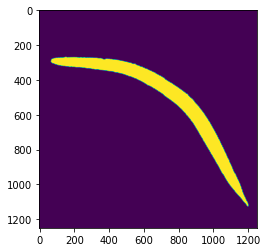

In [3]:
select_worm = cfm.morphology(orig_img=orig_img, worm_idx=1)
plt.imshow(select_worm)
plt.show()

### Get boundary and select boundary points for mapping

In [4]:
bound_x, bound_y, bound_x_int, bound_y_int, endpoints = cfm.get_worm_boundary(image=select_worm)
mapping_idx = cfm.get_mapping_points(endpoints=endpoints, full_boundary_length=len(bound_x))

### Check endpoints and direction of the points
If the points are not arranged in counterclockwise order, set first arg (switch) to True to reverse the points

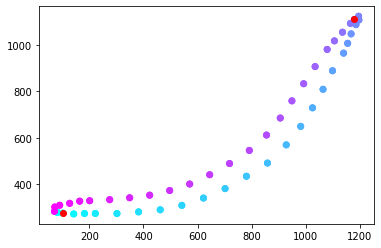

In [5]:
endpoint_idx = [1, 24]
ccw_mapping_points = cfm.check_direction(switch=True, boundary_x=bound_x, boundary_y=bound_y, mapping_idx=mapping_idx, endpoints=endpoint_idx)


### Get interior points and colors

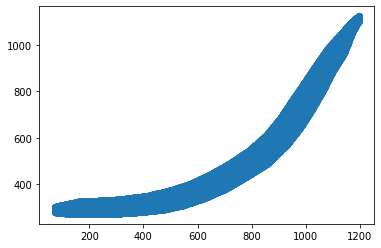

In [6]:
interior_x, interior_y, colors = cfm.get_interior_points(raw_img=raw_img, boundary_x=bound_x_int, boundary_y=bound_y_int, mapping_idx=mapping_idx)

### Perform strip conformal mapping with boundary and then map the interior points using that mapping
Resolution variable used mainly for testing purposes, can be removed in final pipeline to always use highest resolution

In [7]:

res = 1
interior_mapped = cfm.perform_mapping(interior_x=interior_x, interior_y=interior_y, mapping_points=ccw_mapping_points, endpoints=endpoint_idx, resolution=res)


polygon initialization attempted
polygon appears valid
[  81.99988441 +277.25401045j  102.00001419 +274.48672218j
  142.         +271.1151046j   182.         +272.79097727j
  222.         +273.09938159j  302.         +272.75938897j
  382.         +279.9698549j   462.00000008 +288.89035639j
  541.99999892 +307.9848376j   622.00001186 +339.60557217j
  702.00038771 +380.3247843j   780.93647068 +433.66150161j
  858.8315216  +490.61027933j  928.28740634 +569.05712359j
  981.71001147 +648.99613883j 1025.50307816 +729.00022477j
 1064.42682986 +808.99998812j 1099.45954828 +889.00002827j
 1140.50137178 +964.9486674j  1155.50620947+1007.29673237j
 1168.26573224+1048.10229032j 1186.24908751+1088.00417886j
 1197.12100657+1107.99998038j 1196.02938376+1124.17552055j
 1180.16318396+1110.46832551j 1165.68540122+1093.03743616j
 1136.40960686+1055.2254818j  1106.52242615+1017.94717178j
 1079.65906578 +980.97349171j 1035.06855337 +907.00243799j
  992.68183273 +832.99970791j  949.24067046 +759.0085761j
 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/stripmap/mapmath/num_methods.py:199: RuntimeWarning: divide by zero encountered in log
  F1 = np.log(np.divide(rat1, nmlen[np.logical_not(cmplx2)]))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/stripmap/mapmath/num_methods.py:204: RuntimeWarning: divide by zero encountered in log
  F2 = np.log(np.divide(rat2, nmlen[cmplx2]))


Method fsolve_iter_factor was successful.
recursion depth:  1
param solve successful

map initialization successful with following parameters:
                      vertex                   prevertex     alpha      beta
0    81.999884+0277.2540100j  -inf+0.0000000000e+000000j  0.912094 -0.087906
1   102.0000140+274.4867220j  0.000000e+00+0.000000e+00j  0.983003 -0.016997
2   142.0000000+271.1151050j  9.773314e-01+0.000000e+00j  0.959904 -0.040096
3   182.0000000+272.7909770j  1.751552e+00+0.000000e+00j  1.010874  0.010874
4   222.0000000+273.0993820j  2.488996e+00+0.000000e+00j  1.003807  0.003807
5   302.0000000+272.7593890j  3.826792e+00+0.000000e+00j  0.970035 -0.029965
6   382.0000000+279.9698550j  5.065085e+00+0.000000e+00j  0.993265 -0.006735
7   462.0000000+288.8903560j  6.221324e+00+0.000000e+00j  0.960768 -0.039232
8   541.9999990+307.9848380j  7.290042e+00+0.000000e+00j  0.954763 -0.045237
9   622.0000120+339.6055720j  8.365177e+00+0.000000e+00j  0.969952 -0.030048
10  702.00

### Plot the interior mapping to roughly see if the points are correct

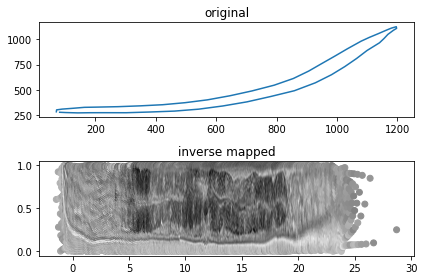

In [8]:
cfm.plot_interior_mapped(mapping_points=ccw_mapping_points, interior_mapped=interior_mapped, colors=colors, resolution=res)

### Interpolate the interior points to get final result

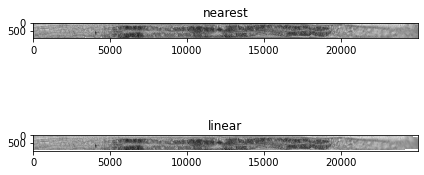

complete


In [9]:
cfm.interpolate_interior(interior_mapped=interior_mapped, colors=colors, resolution=res)